SUPPORT VECTOR MACHINE
Import requried libreries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1: Exploratory Data Analysis (EDA)

1.	Load the Mushroom dataset and perform fundamental data exploration.

2.	Utilize histograms, box plots, or density plots to understand feature distributions.

3.	Investigate feature correlations to discern relationships within the data.


In [35]:
Mushroom = pd.read_csv(r"/content/mushroom.csv")

In [36]:
Mushroom.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [37]:
Mushroom.shape# no of row & coloum

(2000, 26)

In [38]:
Mushroom.size#2000*26

52000

In [39]:
Mushroom.columns#coloum name

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [40]:
Mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [41]:
Mushroom.describe(include='all')

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000.000000,2000.000000
unique,NaN,5,4,9,2,9,4,3,2,12,...,2,4,3,8,9,6,7,2,NaN,NaN
top,NaN,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,...,universal,white,one,sheathing,brown,abundant,urban,poisonous,NaN,NaN
freq,NaN,439,568,263,1023,274,540,677,1007,216,...,1010,553,689,305,255,360,316,1400,NaN,NaN
mean,624.974000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.449118,12.314345
std,375.091938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.697217,7.048845
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,290.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.291009,5.723521
50%,607.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.318596,12.124902
75%,957.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.781272,18.698605


In [42]:
if 'Unnamed: 0' in Mushroom.columns:
    Mushroom.drop(columns=['Unnamed: 0'], inplace=True)

# Now you can safely perform the next operation
Mushroom.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


In [43]:
Mushroom.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


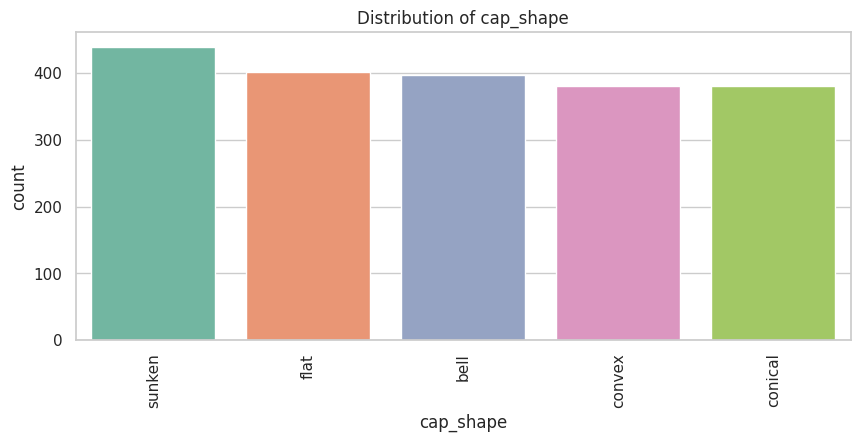

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


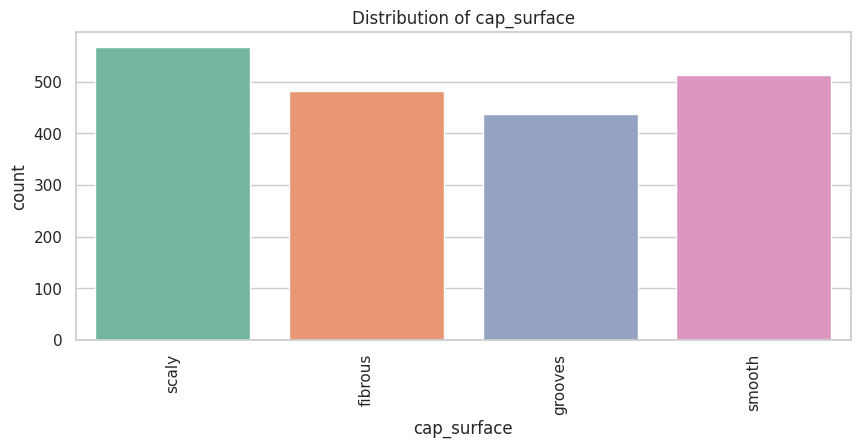

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


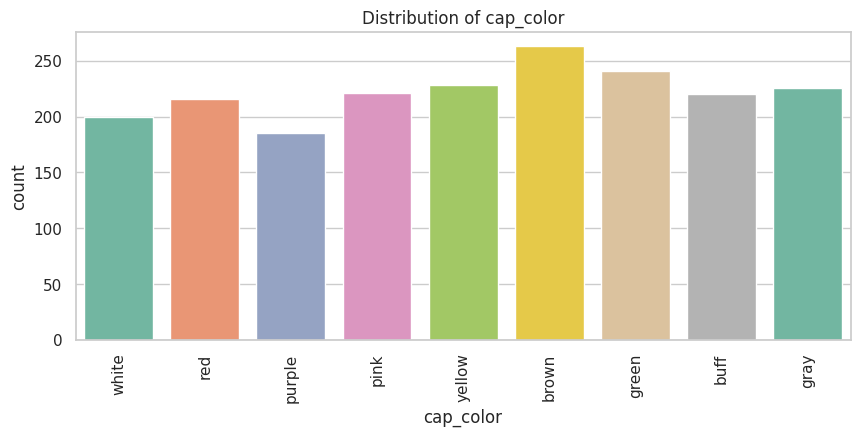

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


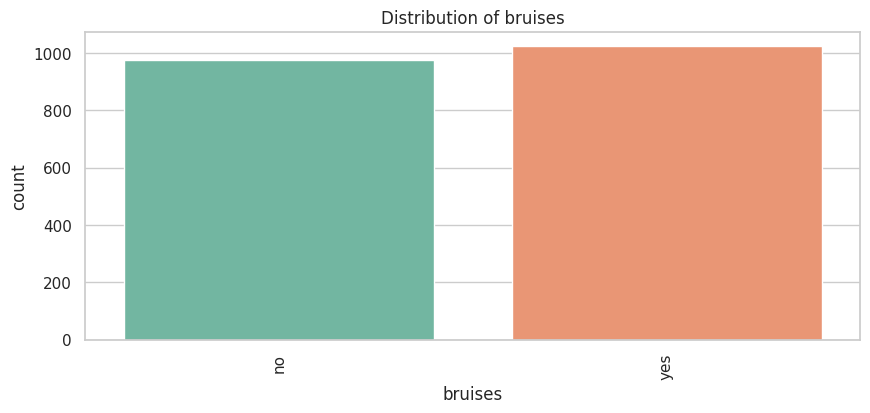

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


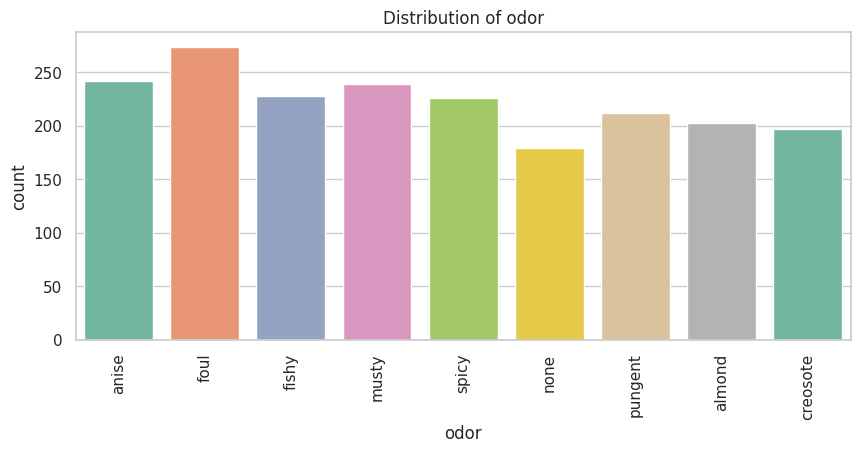

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


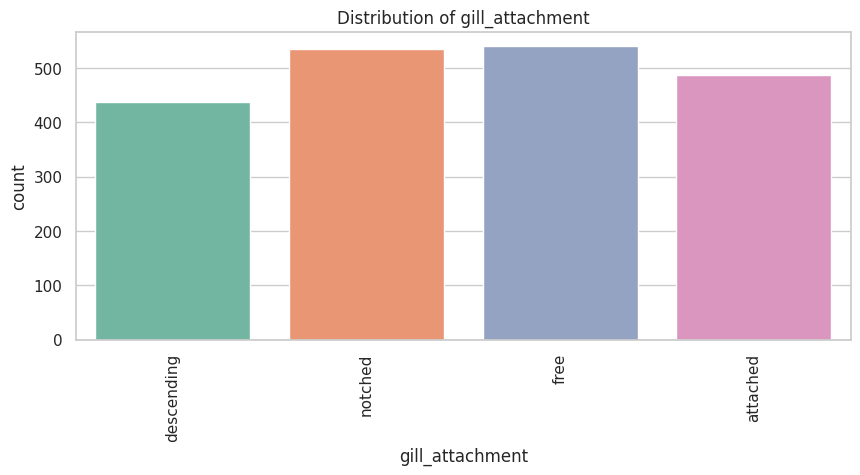

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


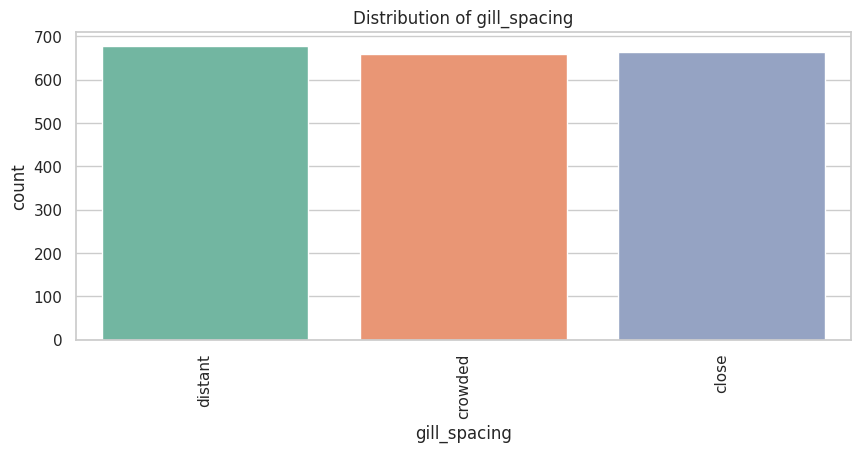

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


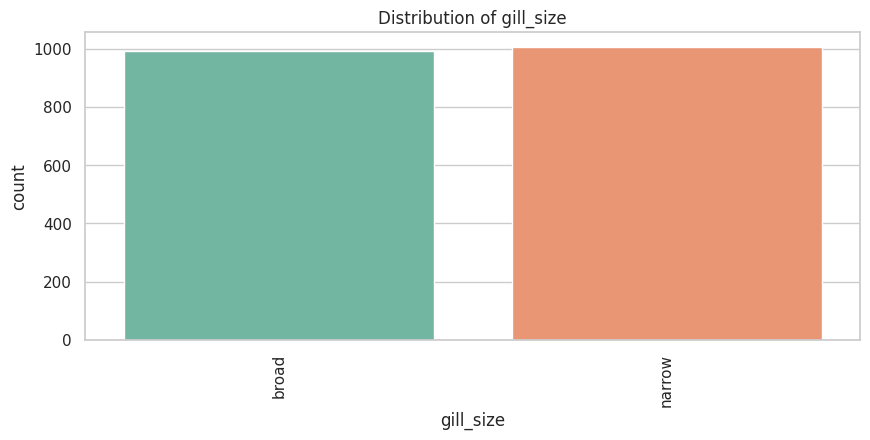

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


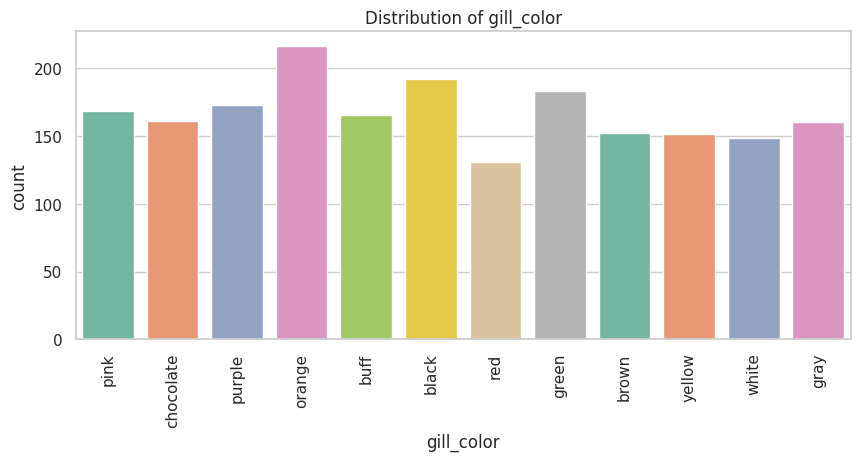

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


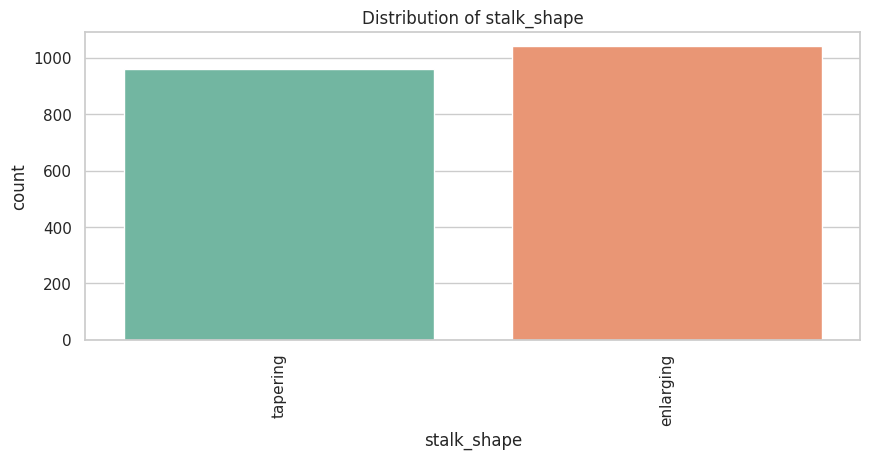

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


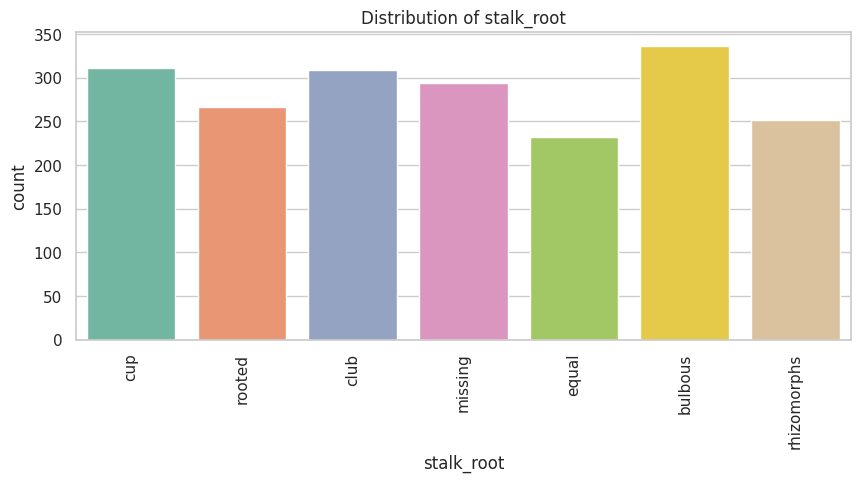

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


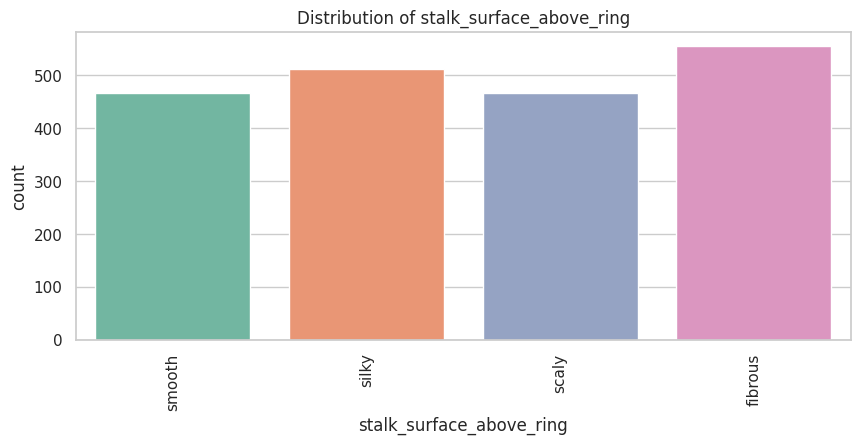

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


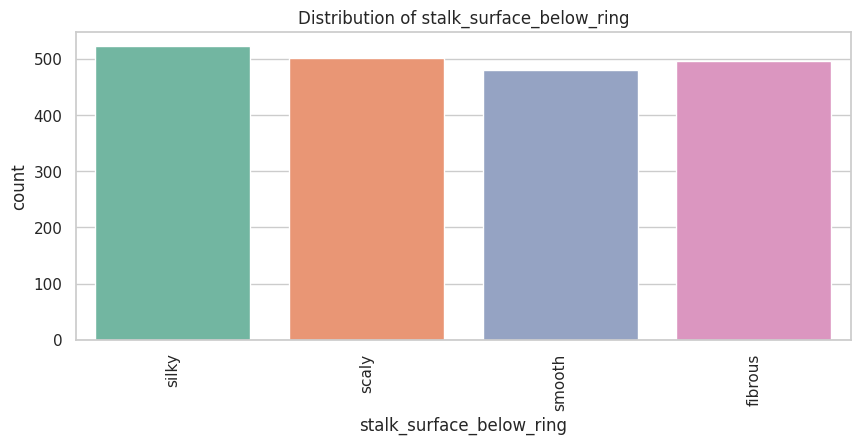

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


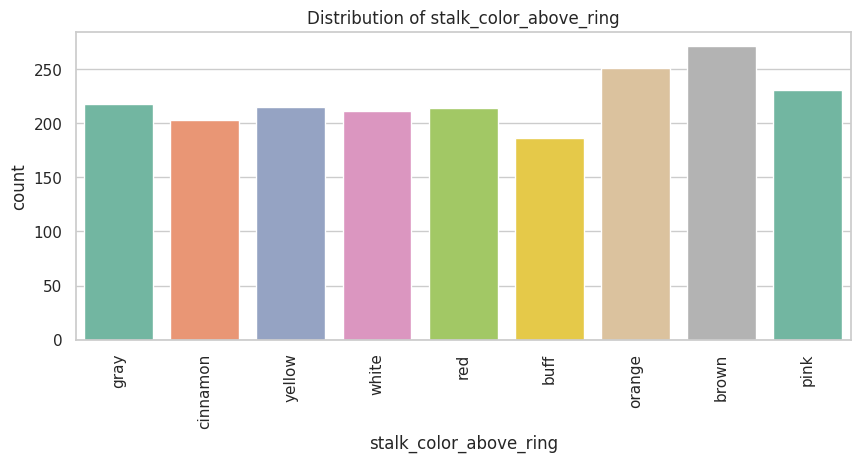

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


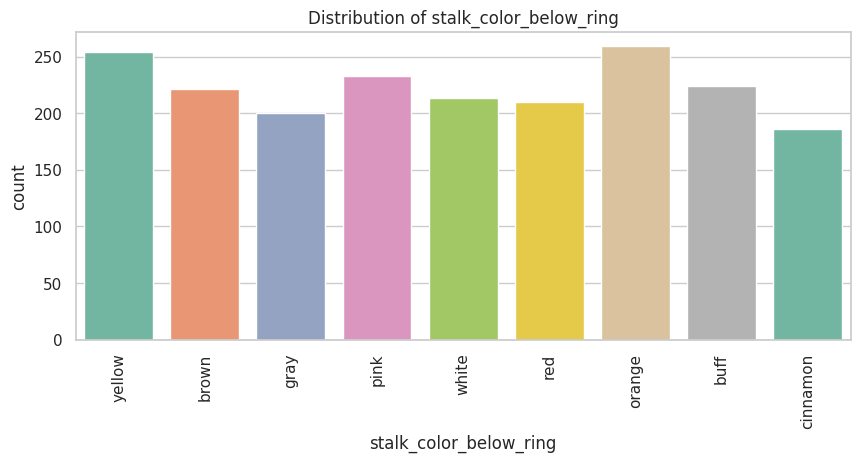

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


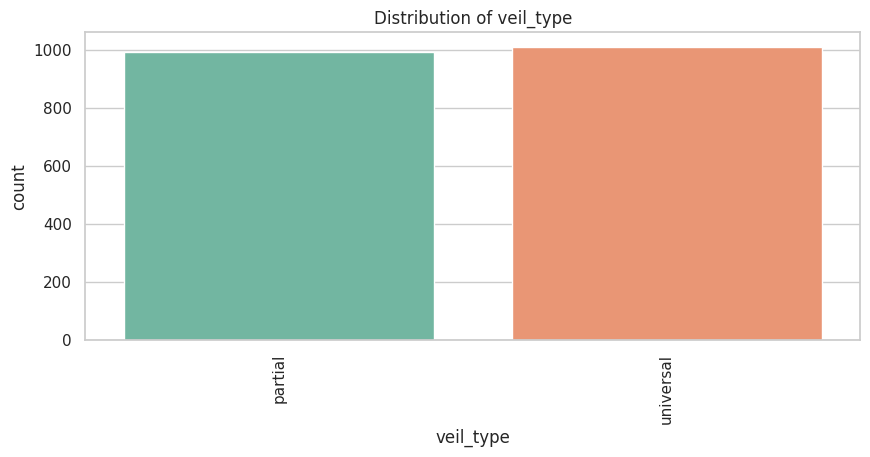

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


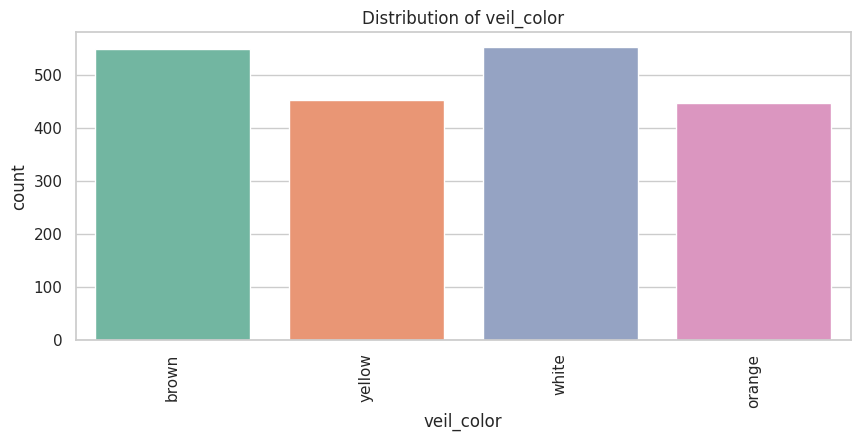

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


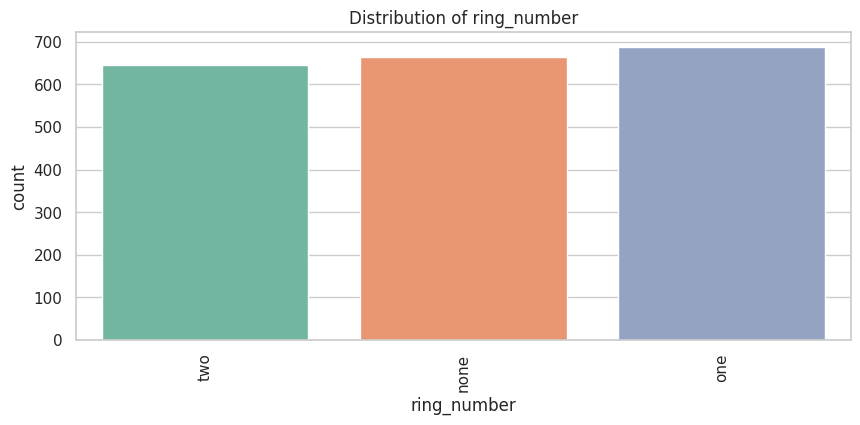

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


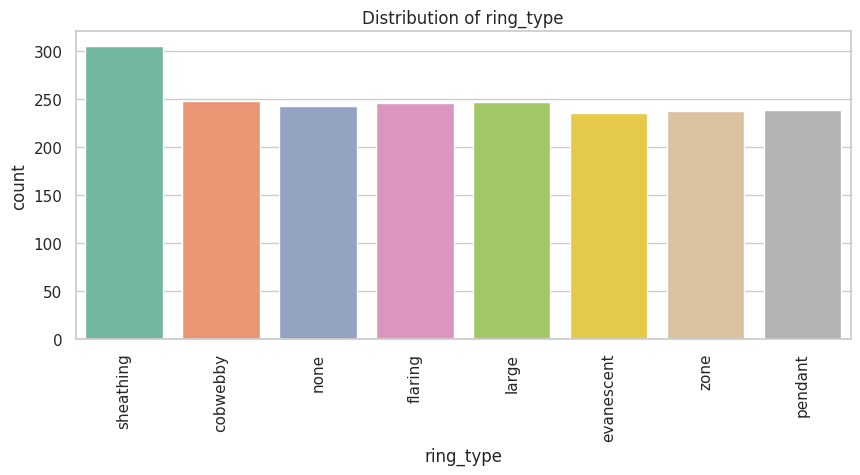

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


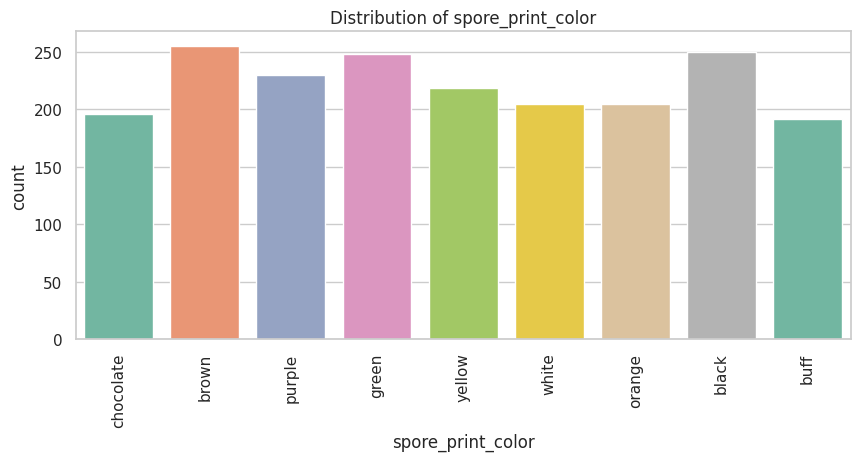

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


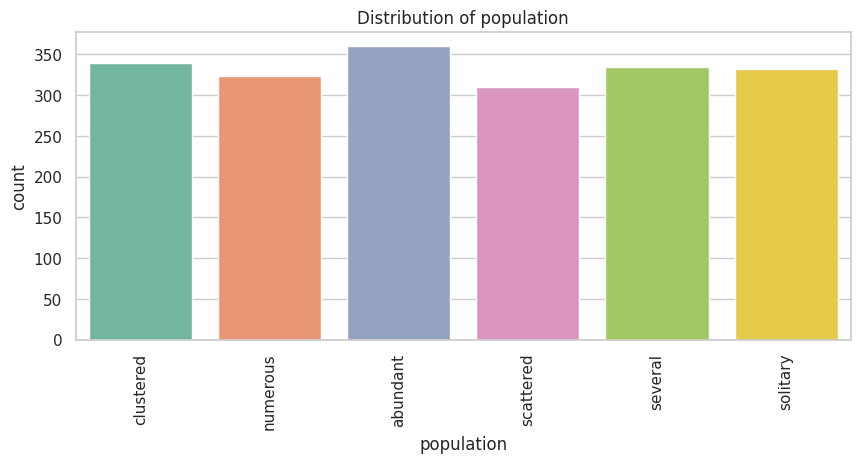

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


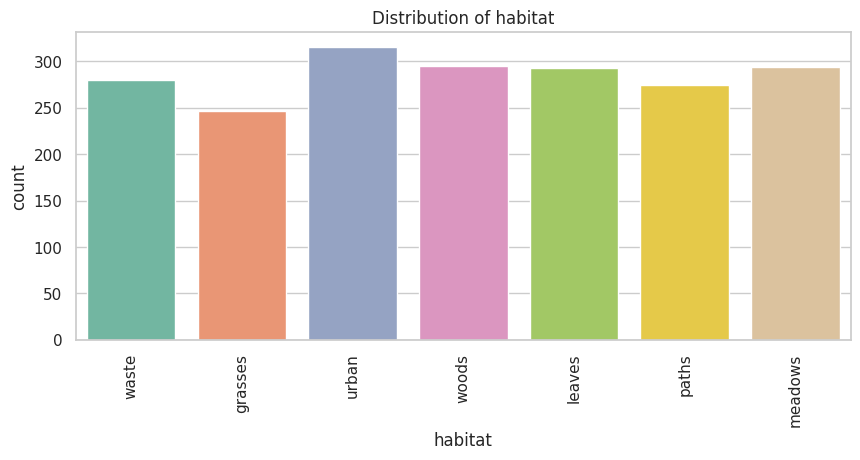

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


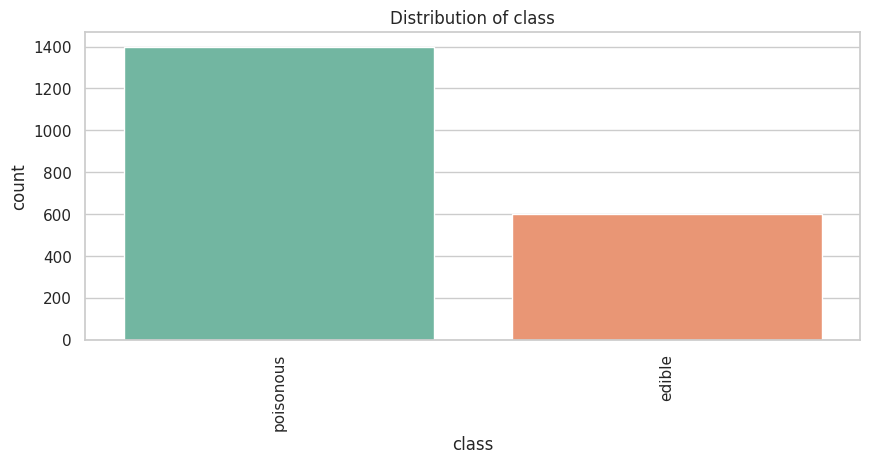

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


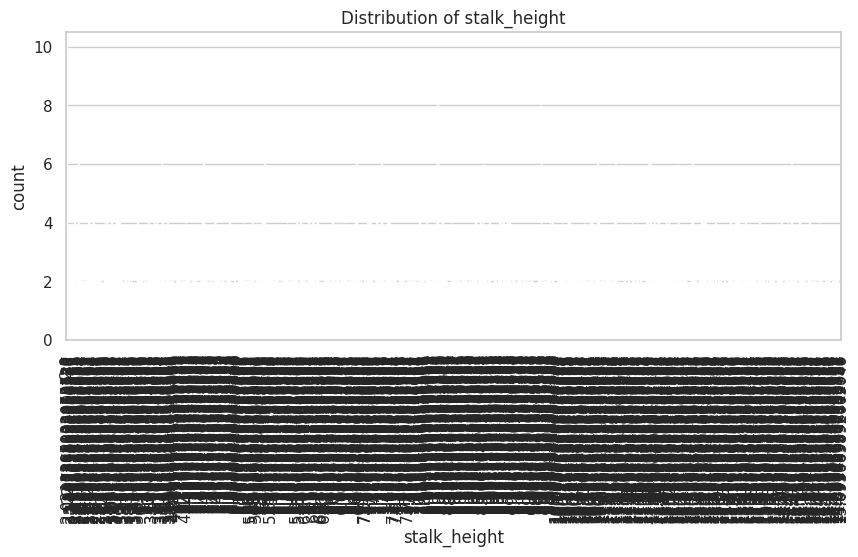

<ipython-input-44-c5d1e230096d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=Mushroom, palette='Set2')


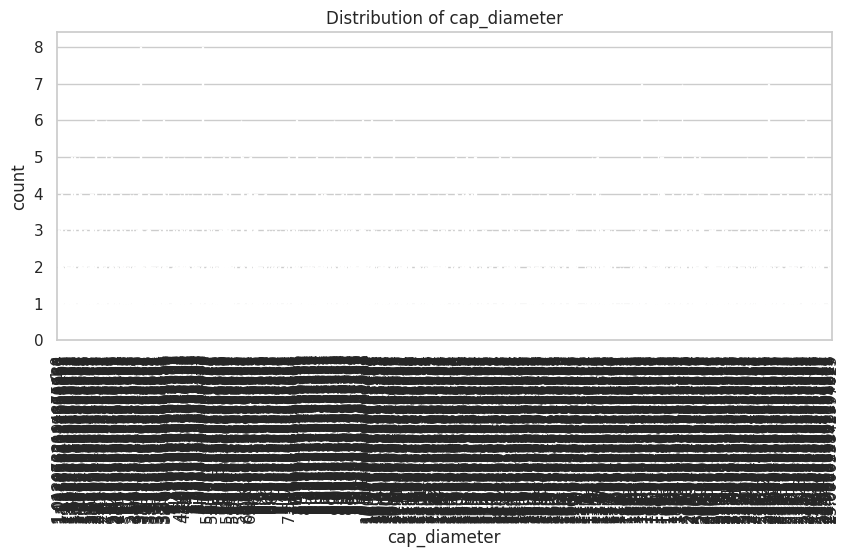

In [44]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of each feature
for column in Mushroom.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=Mushroom, palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()


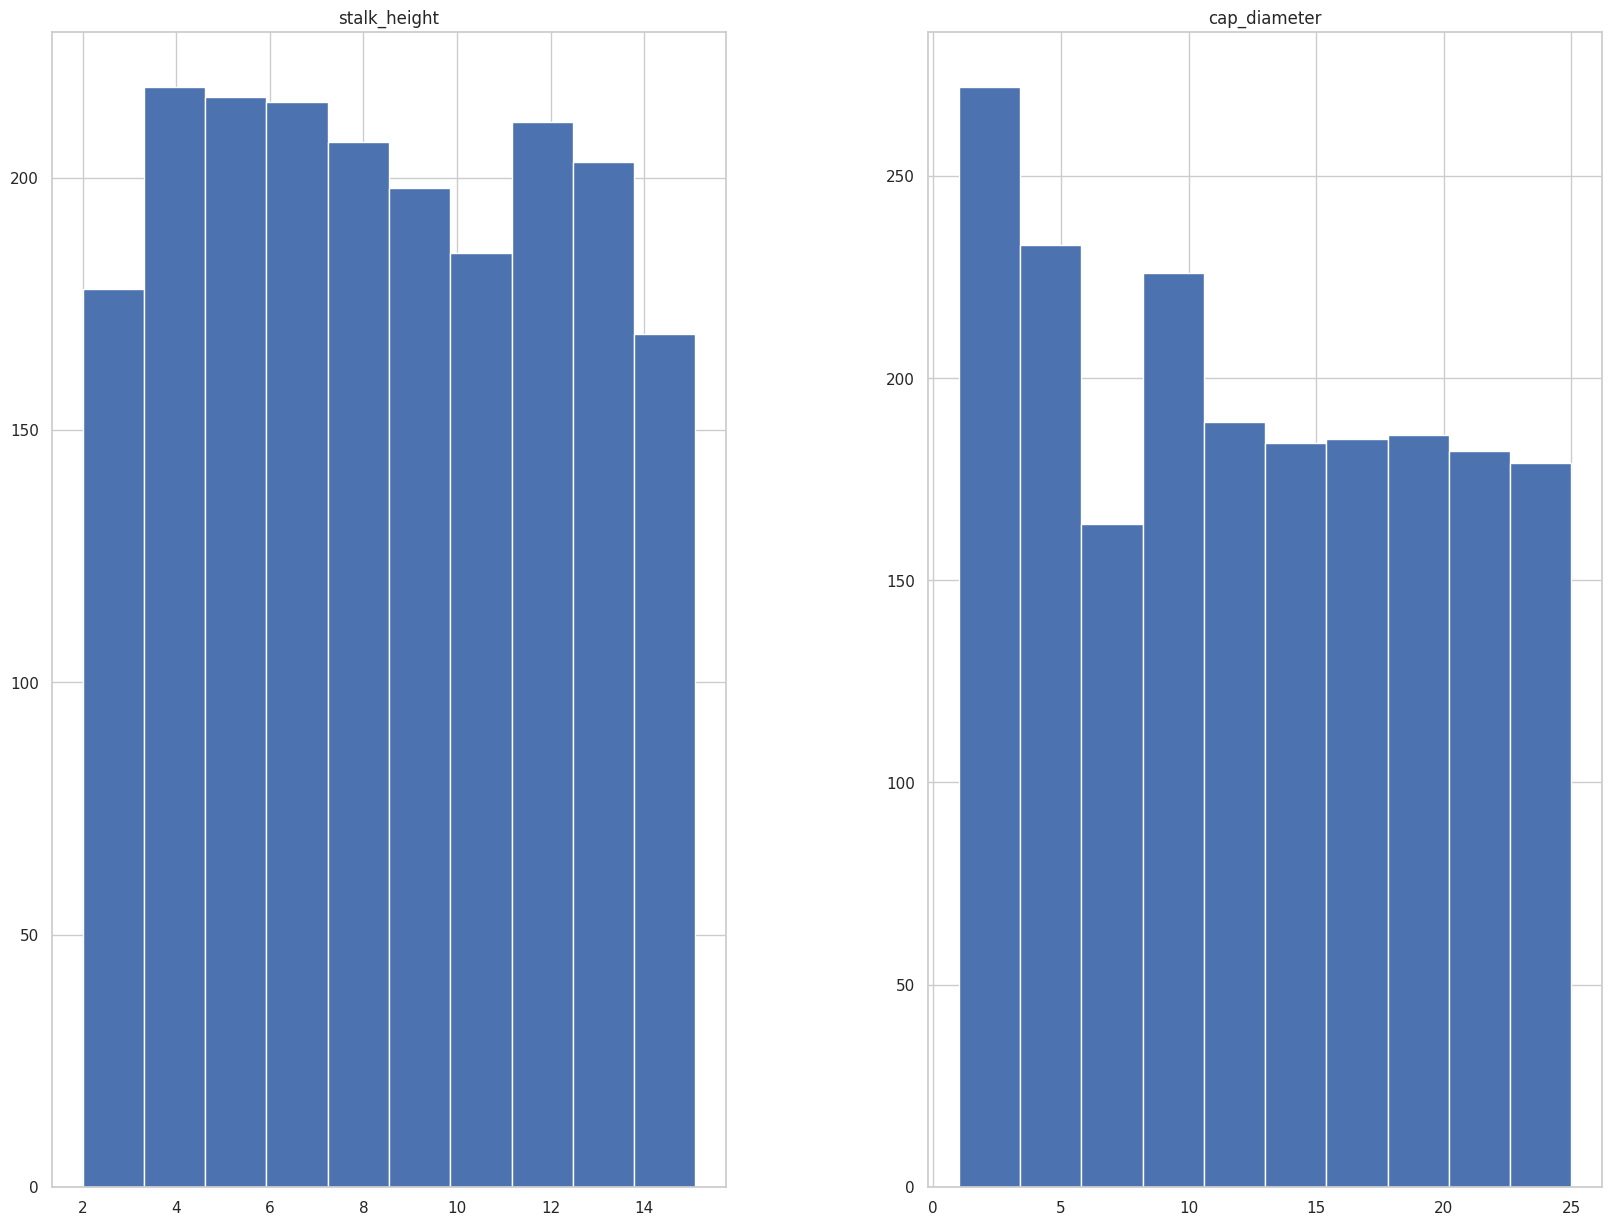

In [45]:
Mushroom.hist(figsize=(20, 15))
plt.show()

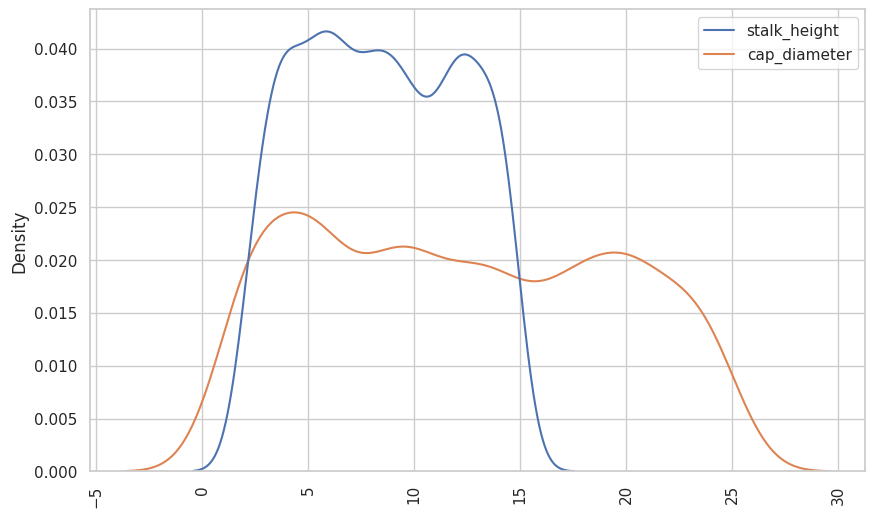

In [46]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=Mushroom)
plt.xticks(rotation=90)
plt.show()


In [47]:
numeric_data = Mushroom.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


              stalk_height  cap_diameter
stalk_height      1.000000     -0.003486
cap_diameter     -0.003486      1.000000


## Task 2: Data Preprocessing

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
label_encoder = LabelEncoder()
for column in Mushroom.select_dtypes(include=['object']).columns:
    Mushroom[column] = label_encoder.fit_transform(Mushroom[column])


In [50]:
Mushroom.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [51]:
Mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   int64  
 1   cap_surface               2000 non-null   int64  
 2   cap_color                 2000 non-null   int64  
 3   bruises                   2000 non-null   int64  
 4   odor                      2000 non-null   int64  
 5   gill_attachment           2000 non-null   int64  
 6   gill_spacing              2000 non-null   int64  
 7   gill_size                 2000 non-null   int64  
 8   gill_color                2000 non-null   int64  
 9   stalk_shape               2000 non-null   int64  
 10  stalk_root                2000 non-null   int64  
 11  stalk_surface_above_ring  2000 non-null   int64  
 12  stalk_surface_below_ring  2000 non-null   int64  
 13  stalk_color_above_ring    2000 non-null   int64  
 14  stalk_co

In [52]:
from sklearn.model_selection import train_test_split
X = Mushroom.drop(columns=['class'],axis=1)
y = Mushroom['class'] # target
X

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,7,1,2,0,4,8,1,4,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,4,0,1,1,2,6,0,1,5.877891,17.464145
1996,4,2,5,1,5,0,2,1,9,1,...,4,0,2,1,7,8,2,5,6.500840,13.501957
1997,2,1,3,1,3,3,0,1,7,1,...,6,0,0,2,1,8,0,6,13.558064,11.270020
1998,0,3,7,0,7,2,0,1,6,0,...,5,1,3,1,0,1,5,6,11.092703,8.423199


In [53]:
y

,class
0,1
1,0
2,1
3,1
4,1
...,...
1995,1
1996,1
1997,1
1998,1


In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [55]:
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

X_train : (1500, 24)
X_test : (500, 24)
y_train : (1500,)
y_test : (500,)


## Task 3: Data Visualization

1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

2.	Visualize class distributions to gauge dataset balance or imbalance.


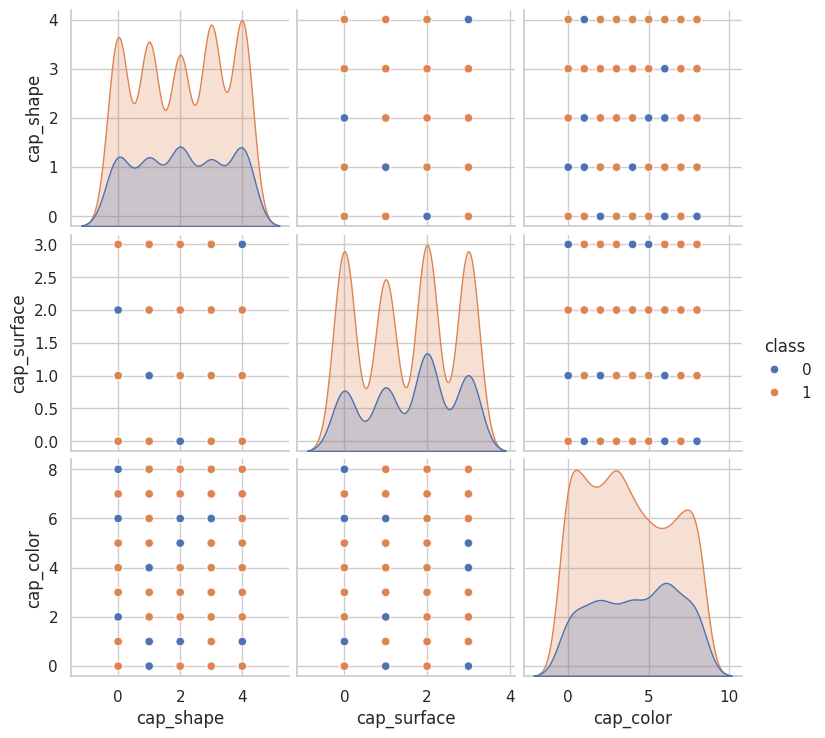

In [56]:
# Scatter plots for pairs of features
sns.pairplot(Mushroom, hue='class', vars=['cap_shape', 'cap_surface', 'cap_color'])
plt.show()


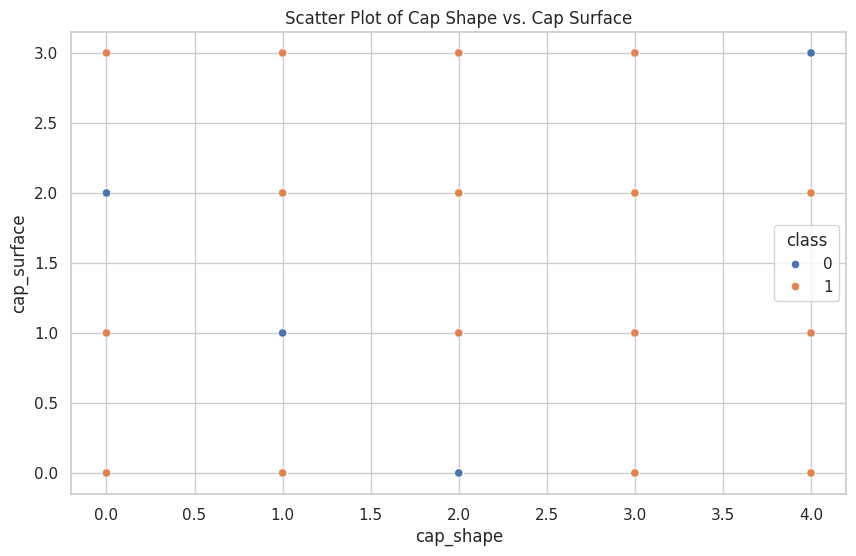

In [57]:
# Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cap_shape', y='cap_surface', hue='class', data=Mushroom)
plt.title('Scatter Plot of Cap Shape vs. Cap Surface')
plt.show()

<Axes: >

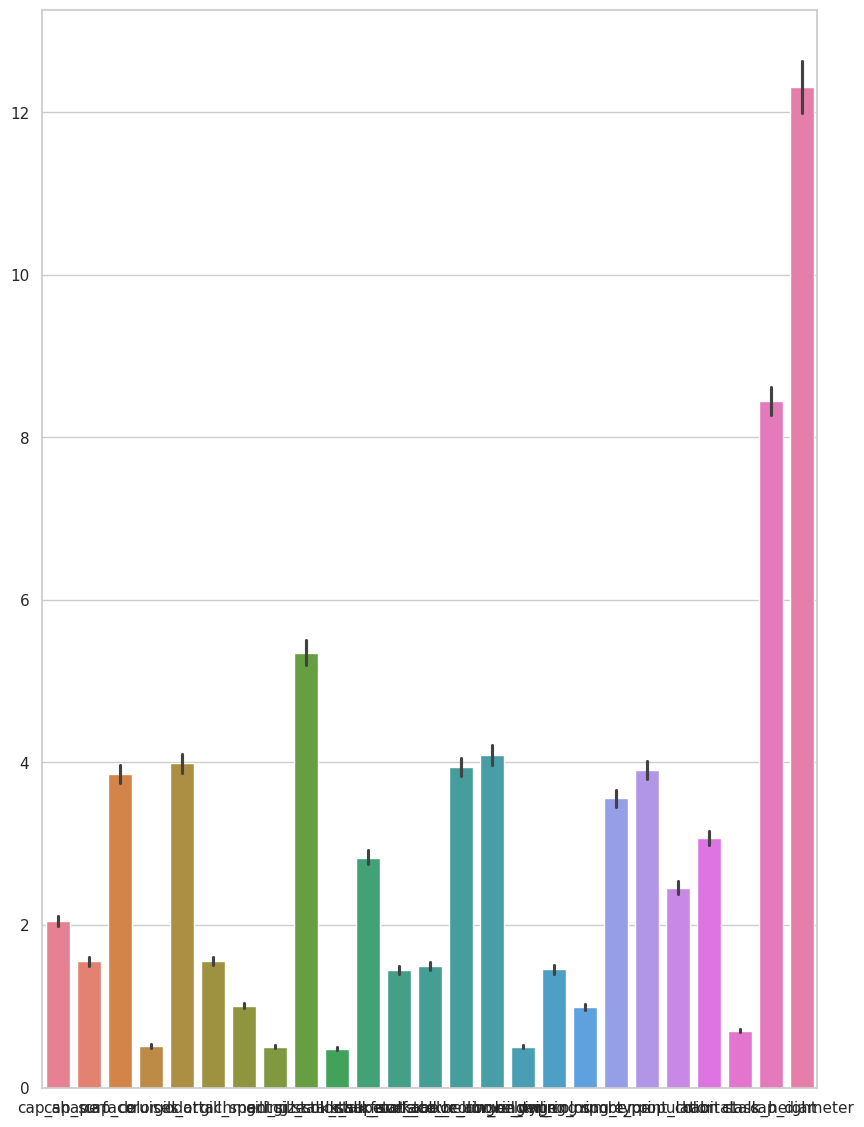

In [58]:
plt.figure(figsize=(10,14))
sns.barplot(Mushroom)

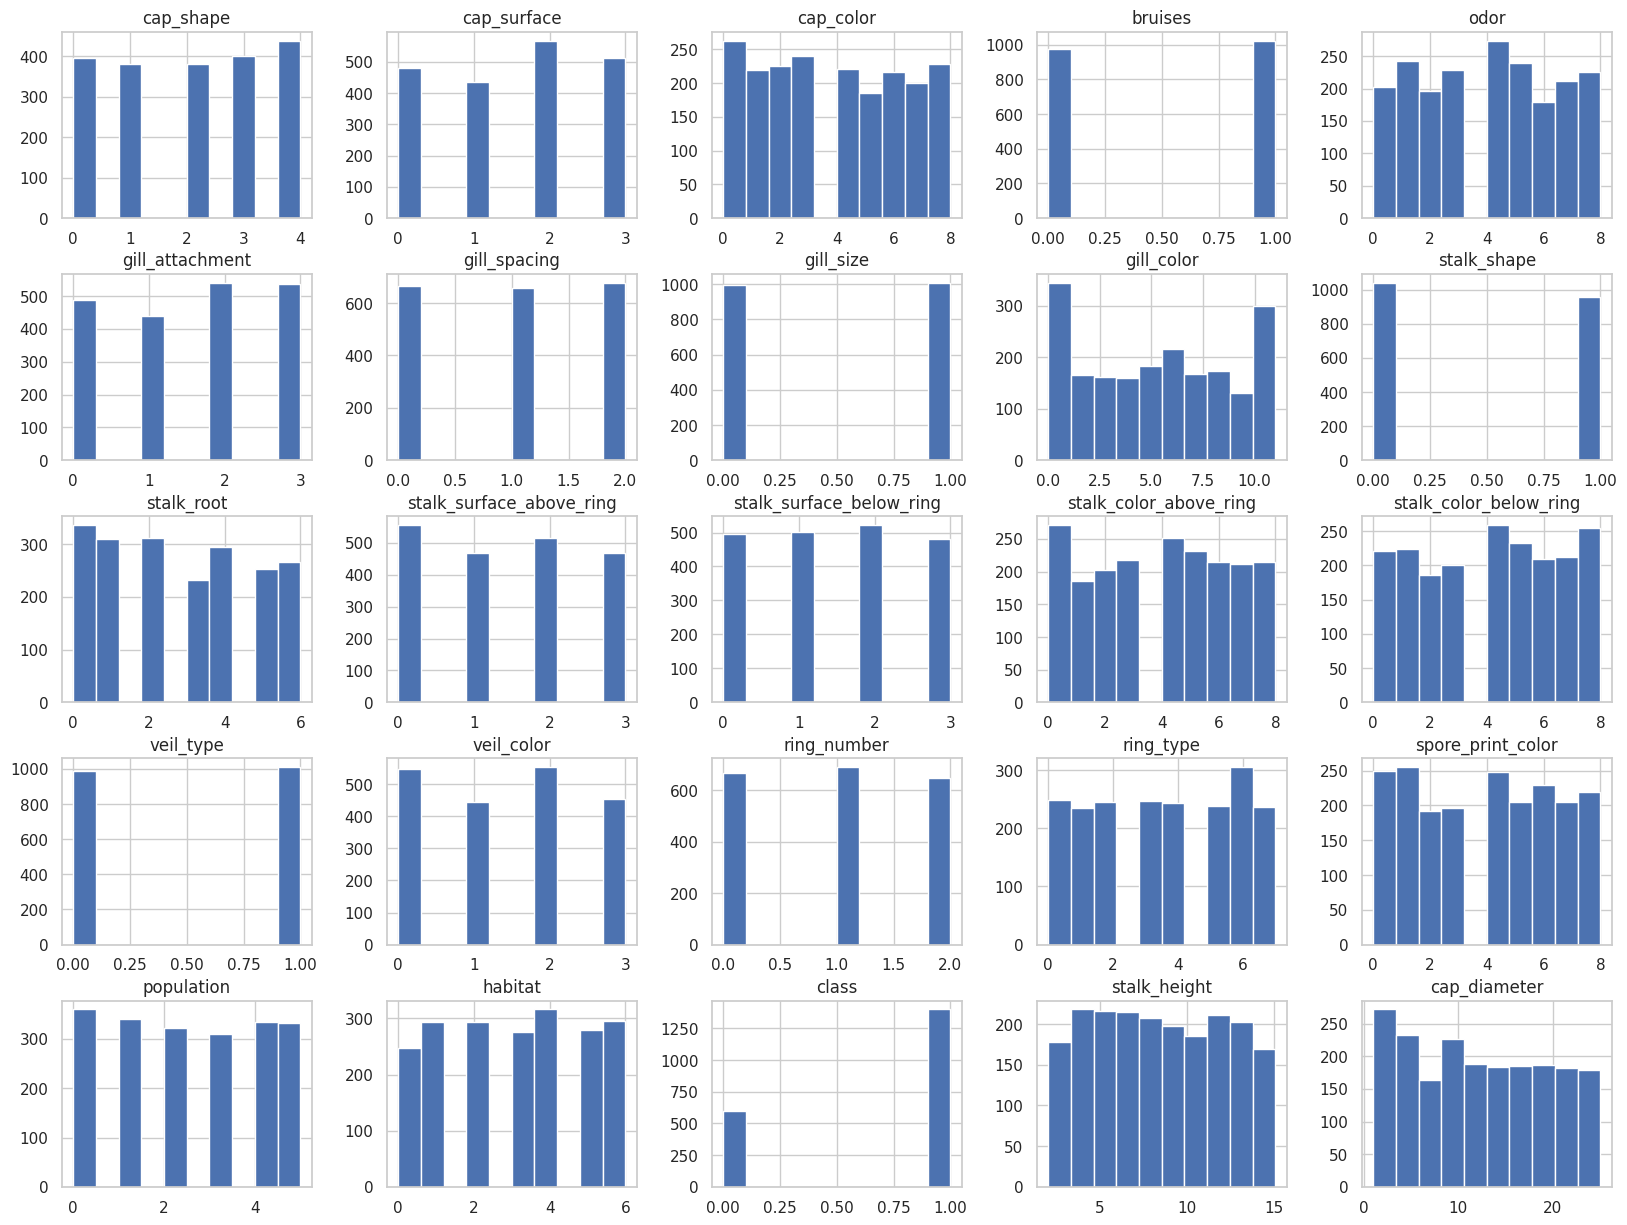

In [59]:
Mushroom.hist(figsize=(20, 15))
plt.show()


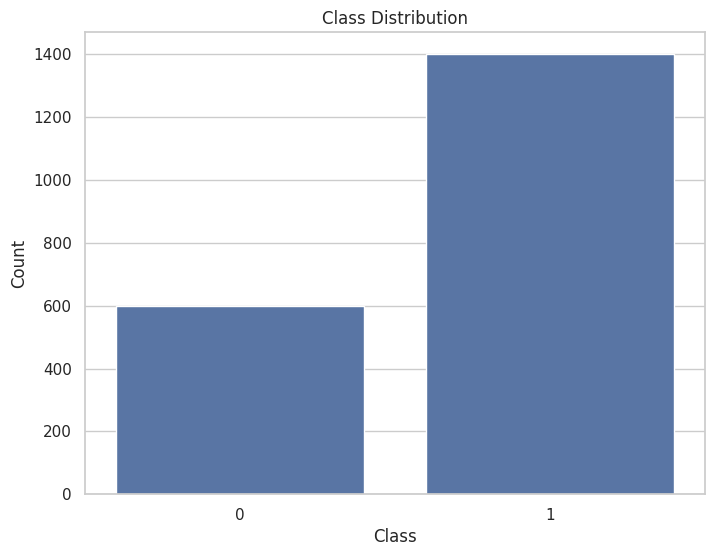

In [60]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=Mushroom)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [61]:
Mushroom.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

## Task 4: SVM Implementation

1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

2.	Train the SVM model on the training data.

3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [ ]:
#Implement a basic SVM classifier using Python libraries like scikit-learn.
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
# Create an SVM classifier
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)


In [ ]:
svm_model

In [ ]:
# Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred,})

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Task 5: Visualization of SVM Results

1.	Visualize classification results on the testing data.

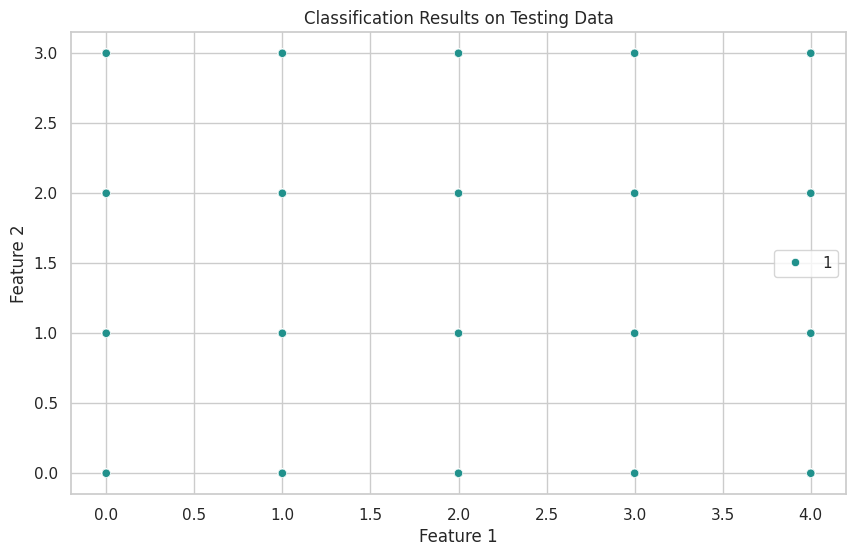

In [62]:
# Visualize classification results on the testing data.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred, palette='viridis')
plt.title('Classification Results on Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Task 6 :- Parameter tuning and optimization

1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [63]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}


In [64]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

In [65]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

In [66]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=scale,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [67]:
print(grid.best_params_)

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [68]:
print(grid.best_score_)

0.8446666666666667


## Task 7: Comparison and Analysis

1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [69]:
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Kernel: {kernel}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Kernel: linear
[[  0 159]
 [  0 341]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       159
           1       0.68      1.00      0.81       341

    accuracy                           0.68       500
   macro avg       0.34      0.50      0.41       500
weighted avg       0.47      0.68      0.55       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kernel: poly
[[ 12 147]
 [  0 341]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.14       159
           1       0.70      1.00      0.82       341

    accuracy                           0.71       500
   macro avg       0.85      0.54      0.48       500
weighted avg       0.79      0.71      0.61       500

Kernel: rbf
[[  0 159]
 [  0 341]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       159
           1       0.68      1.00      0.81       341

    accuracy                           0.68       500
   macro avg       0.34      0.50      0.41       500
weighted avg       0.47      0.68      0.55       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
